**Chinh Minh Nguyen**

Spring 2023

CS 251: Data Analysis and Visualization

Project 5: Clustering

In [87]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
from scipy.spatial import distance

import kmeans

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 1: K-means clustering

In this task, you will implement the K-means clustering algorithm and test your code on simple test data.

### 1a) Import `super_simple` data

- In the cell below, use pandas to load in `super_simple.csv` (30 x,y values), convert the Dataframe to a ndarray.
- Create a scatter plot below to see what the data look like.

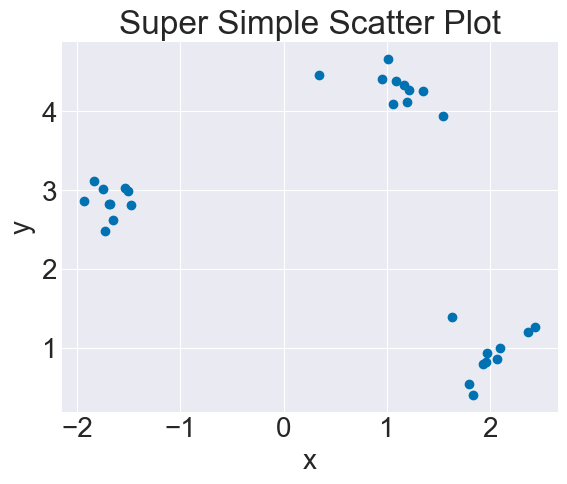

In [88]:
# Load the csv file using pandas
df = pd.read_csv('data/super_simple.csv')

# Convert the DataFrame to a numpy ndarray
super_simple = df.to_numpy()

# Create a scatter plot of the data
plt.scatter(super_simple[:,0], super_simple[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Super Simple Scatter Plot')
plt.show()

### 1b) Implement and test core K-means methods

In this task, you will implement the methods needed to cluster a dataset using K-means. The goal of this subtask is to create a scatterplot with each data sample color-coded based on the cluster it belongs to. You will be testing on the `super_simple` data.

In `kmeans.py` implement the following methods, using the following test code to help you out along the way:
- `set_data`: Update the data stored by the k-means clustering object.
- `get_data`: Return a copy of the data.
- `dist_pt_to_pt`: Compute the Euclidean distance from one data sample to one other. See below for formula.
- `dist_pt_to_centroids`: Compute the distance from one data sample to all the cluster centroids.
- `initialize`: Initalize K-means by setting the initial centroids
- `update_labels`: Assign each data sample to the nearest centroid
- `update_centroids`: Calculate each cluster's centroid, given the data samples that are assigned to it.
- `inertia`: Calculate the mean squared distance between each data sample and its (nearest) centroid. This is a 'quality of clustering' performance metric for analysis
- `cluster`: Run K-means to cluster the data. This is the actual method you call to do the clustering (above methods are helper methods).
- `plot_clusters`: Creates a scatterplot of the data (2D only) with data assigned to each cluster sharing the same color.

**Formula for Euclidean distance:**
$$dist \left (\vec{p_0}, \vec{p_1} \right ) = \sqrt{\left (d_{0} - e_{0} \right )^2 + \left (d_{1} - e_{1} \right )^2  + \ldots}$$

for data samples $\vec{p_0} = \left (d_{0}, d_{1}, \ldots \right )$ and $\vec{p_1} = \left (e_{0}, e_{1}, \ldots \right )$

#### Test constructor

In [89]:
cluster = kmeans.KMeans(super_simple)
print(f'Data isnt none? {np.all(cluster.data != None)}')
print(f'Data num samples isnt none? {np.all(cluster.num_samps != None)}')
print(f'Data num samples is {cluster.num_samps} and should be 30.')
print(f'Data num features isnt none? {np.all(cluster.num_features != None)}')
print(f'Data num features is {cluster.num_features} and should be 2.')



Data isnt none? True
Data num samples isnt none? True
Data num samples is 30 and should be 30.
Data num features isnt none? True
Data num features is 2 and should be 2.


#### Test `get_data`

In [90]:
super_simple_cpy = cluster.get_data()
super_simple_cpy[0,:] = -99
if np.all(cluster.data[0,:] == -99):
    print('You didnt return a copy of the data! Re-import the super_simple data and try again...')
else:
    print('All good!')

All good!


#### Test `dist_pt_to_pt`

In [91]:
a = np.array([1, 2, 3, 4])
b = 4*a
print(f'Your pt-to-pt distance is {cluster.dist_pt_to_pt(a, b)}')
print(f'Correct pt-to-pt distance is {np.linalg.norm(a-b)}')

Your pt-to-pt distance is 16.431676725154983
Correct pt-to-pt distance is 16.431676725154983


#### Test `dist_pt_to_centroids`

In [92]:
test_pt = np.array([[1, 2]])
test_centroids = np.array([[9, 9], [11, 11], [0, 0]])
print(f'Your pt-to-centroids distance is {cluster.dist_pt_to_centroids(test_pt.flatten(), test_centroids)}')
print(f'Correct pt-to-centroids distance is {distance.cdist(test_pt, test_centroids)[0]}')

Your pt-to-centroids distance is [10.63015 13.45362  2.23607]
Correct pt-to-centroids distance is [10.63015 13.45362  2.23607]


#### Test `initialize`

In [93]:
test_k = 3
init_centroids = cluster.initialize(test_k)
print(f'Initial cluster centroids shape is:\n{init_centroids.shape} and should be (3, 2)')

Initial cluster centroids shape is:
(3, 2) and should be (3, 2)


#### Test `update_labels`

In [94]:
# Consistently set initial centroids for test
init_centroids = np.array([[ 0.338, 4.4672], [-1.8401, 3.1123], [1.7931, 0.5427]])

new_labels = cluster.update_labels(init_centroids)
print(f'After the first update data label step, 1st 10 of your cluster assignments are:\n{new_labels[:10]}')
print('Your 1st 10 cluster assignments should be:\n[0 1 1 1 2 0 2 1 2 1]')

After the first update data label step, 1st 10 of your cluster assignments are:
[0 1 1 1 2 0 2 1 2 1]
Your 1st 10 cluster assignments should be:
[0 1 1 1 2 0 2 1 2 1]


#### Test `update_centroids` (1/2)

In [95]:
new_centroids, diff_from_prev_centroids = cluster.update_centroids(test_k, new_labels, init_centroids)
print(f'After the first centroid update, your cluster assignments are:\n{new_centroids}')
print(f'Your difference from previous centroids:\n{diff_from_prev_centroids}')
print('\nYou should see:')
print('''After the first centroid update, your cluster assignments are:
[[ 1.09087  4.29295]
 [-1.68133  2.85917]
 [ 2.00717  0.9184 ]]
Your difference from previous centroids:
[[ 0.75287 -0.17425]
 [ 0.15877 -0.25313]
 [ 0.21407  0.3757 ]]
''')

After the first centroid update, your cluster assignments are:
[[ 1.09087  4.29295]
 [-1.68133  2.85917]
 [ 2.00717  0.9184 ]]
Your difference from previous centroids:
[[ 0.75287 -0.17425]
 [ 0.15877 -0.25313]
 [ 0.21407  0.3757 ]]

You should see:
After the first centroid update, your cluster assignments are:
[[ 1.09087  4.29295]
 [-1.68133  2.85917]
 [ 2.00717  0.9184 ]]
Your difference from previous centroids:
[[ 0.75287 -0.17425]
 [ 0.15877 -0.25313]
 [ 0.21407  0.3757 ]]



#### Test `update_centroids` (2/2)

Test special case when no sample gets assigned to one of the clusters.

In [96]:
np.random.seed(0)

print('Test 2: There are 5 clusters, but no samples assigned to 3rd and last cluster.')
print('There should be no Runtime warnings thrown and the centroid arrays should not have any nan values.')
print(100*'-')
test_k_2 = 5
new_labels_2 = new_labels.copy()
new_labels_2[new_labels_2 == 2] = 3
init_centroids_2 = np.vstack([init_centroids, np.random.random(size=(2, 2))])
new_centroids_2, diff_from_prev_centroids_2 = cluster.update_centroids(test_k_2, new_labels_2, init_centroids_2)
print(f'After the first centroid update, your cluster assignments are:\n{new_centroids_2}')
print(f'Your difference from previous centroids:\n{diff_from_prev_centroids_2}')

Test 2: There are 5 clusters, but no samples assigned to 3rd and last cluster.
There should be no Runtime warnings thrown and the centroid arrays should not have any nan values.
----------------------------------------------------------------------------------------------------
After the first centroid update, your cluster assignments are:
[[ 1.09087  4.29295]
 [-1.68133  2.85917]
 [-1.6855   2.8272 ]
 [ 2.00717  0.9184 ]
 [ 1.1924   4.1182 ]]
Your difference from previous centroids:
[[ 0.75287 -0.17425]
 [ 0.15877 -0.25313]
 [-3.4786   2.2845 ]
 [ 1.45836  0.20321]
 [ 0.58964  3.57332]]


You should see: 
    
    After the first centroid update, your cluster assignments are:
    [[ 1.09087  4.29295]
    [-1.68133  2.85917]
    [some_float  some_float ]
    [ 2.00717  0.9184 ]
    [some_float  some_float ]]
    Your difference from previous centroids:
    [[ 0.75287 -0.17425]
    [ 0.15877 -0.25313]
    [some_float  some_float ]
    [some_float  some_float]
    [some_float  some_float]]

**NOTE:** Each `some_float` above should be a different random float value and not `nan` or all `0`s.

#### Test `inertia`

In [97]:
cluster.centroids = new_centroids
cluster.data_centroid_labels = new_labels
print(f'After the first test k-means update, your inertia is:\n{cluster.compute_inertia()}\nIt should be\n0.10738760429999998')

After the first test k-means update, your inertia is:
0.1073876043
It should be
0.10738760429999998


#### Test `plot_clusters` and `cluster`

In the cell below:

- Run K-means on the `super_simple` dataset, picking $k$ that makes sense.
- Run `plot_clusters` to generate a scatterplot showing the cluster assignments of the data in different colors. Nearby samples in your scatterplot should have the same color most of the times that you run your code (*this may not be true **every** time you run your code to generate the plot and that is expected! You are aiming for most of the time.*). Here is an example:

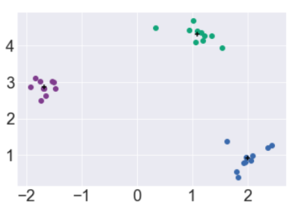

K-means clustering converged after 2 iterations


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


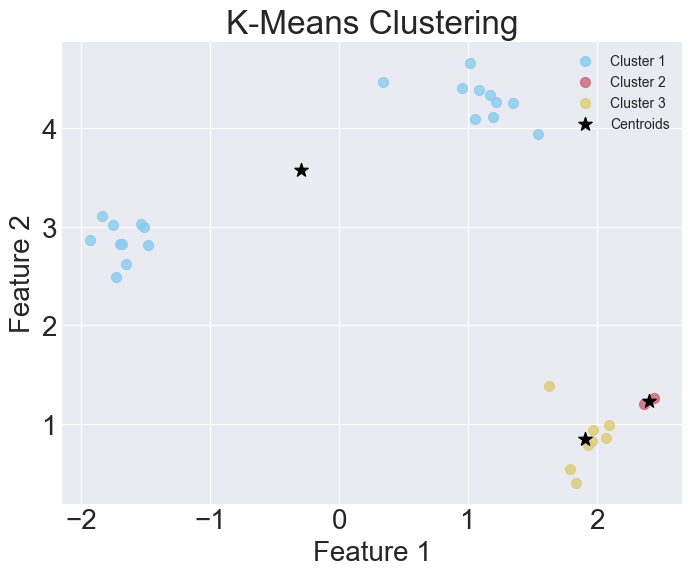

In [98]:
cluster.cluster(k = 3, verbose = True)
cluster.plot_clusters()

### 1c) Determining the number of clusters $k$

In this task, you will explore how to determine the number of clusters in a dataset.

- Implement `elbow_plot` in `kmeans.py`.
- Create an elbow plot below for the `super_simple` dataset. It should look like the below image.

**NOTE:** Make sure to include a meaningful x label, y label, and x tick marks.

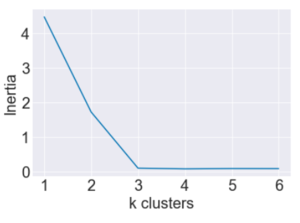

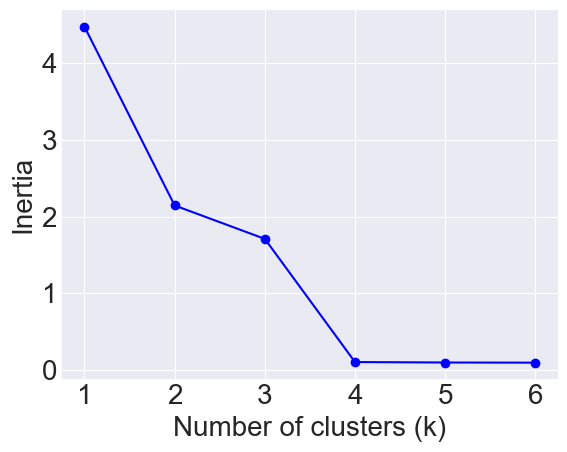

In [99]:
cluster.elbow_plot(6, 1)

**Question 1:** How many clusters are there in the `super_simple` data, based on the elbow plot that you made? Briefly explain how you determined this.

**Answer 1:** Based on the elbow plot, it appears that there are 3 clusters in the super_simple data. This is determined by identifying the "elbow" point on the plot, where the decrease in inertia starts to level off. In this case, the elbow point appears to be at k=3, where the inertia drops dramatically from k=2, and then starts to level off at around 0.1 for larger k values. This suggests that adding more clusters beyond k=3 does not provide much additional improvement in clustering performance.

#### 1d) Clustering the `five_blobs` dataset

Load in the `five_blobs` dataset then in the cell below:
- create a scatterplot showing the 2D dataset (without any clustering).
- run K-means to cluster the dataset with a reasonable number of clusters (based on what you observe in the scatterplot).
- create a scatterplot showing the clustered data.

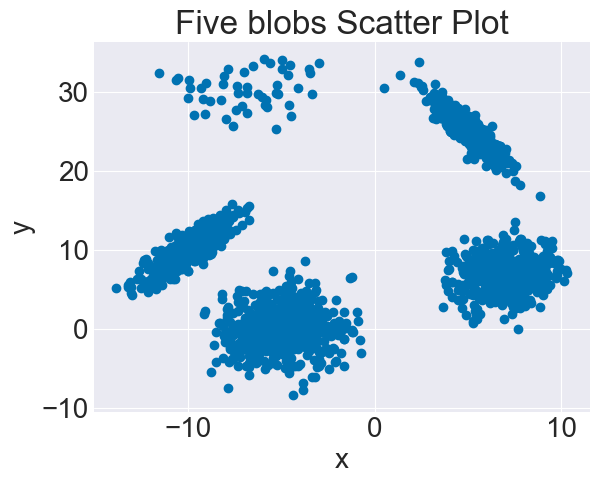

In [100]:
# load df
df2 = pd.read_csv('data/five_blobs.csv')

# convert to np
five_blobs = df2.to_numpy()

# create kmeans object
five_cluster = kmeans.KMeans(five_blobs)

# create a scatter plot of the data
plt.scatter(five_blobs[:,0], five_blobs[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Five blobs Scatter Plot')
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

K-means clustering converged after 4 iterations


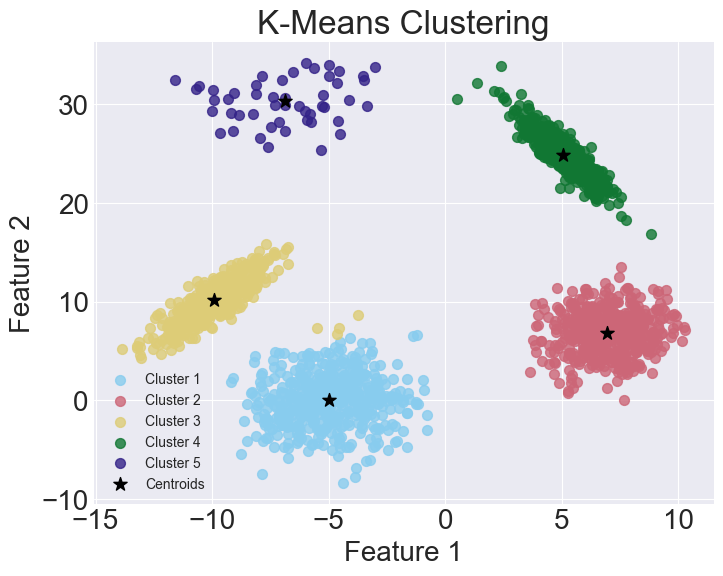

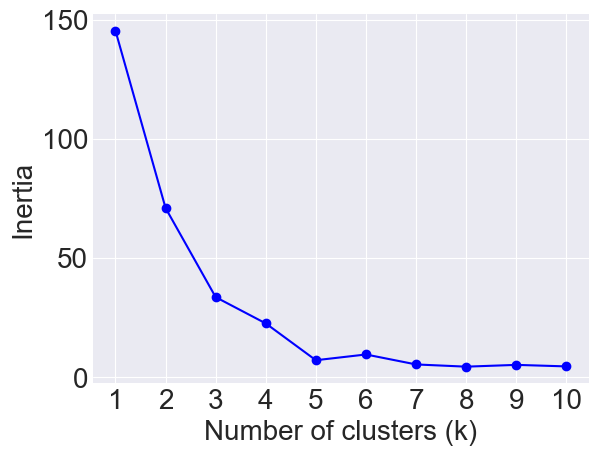

In [101]:
# place me before you cluster the dataset
np.random.seed(4)

# run k-means
five_cluster.cluster(5, verbose=True)

# plot cluster
five_cluster.plot_clusters()

# elbow plot
five_cluster.elbow_plot(10, 1)

#### Questions

**Question 2:** Run K-means and make the above scatterplot showing the clusters at least 5 times, changing the random seed value each time (e.g. with `np.random.seed(0)`, `np.random.seed(1)`, etc.). What do you observe about how the cluster assignments match up with the clusters that you see visually? **Why does this happen?**

**Question 3:** Have your code in above the cell also generate an elbow plot with `k` running from 1 to 10. As you change the random seed, how predictive is the elbow plot of the number of clusters in the dataset? In order words, if you had to only rely on the elbow plot to determine the number of clusters (without looking at the scatterplot), how often would you be correct? **Explain your reasoning.**

**Answer 2:** At each of the lower seed levels (0, 1, 2, 3), one of the clusters are divided into two and the cluster on top of the plot does not have a centroid in it. However, at seed = 4, all the clusters have a centroid occupying it. On top of that, at every seed level, all the clusters are the same regardless of how many times one runs it. This is because the data is well-behaved and the clusters are well-defined, meaning that the clustering results are likely to be consistent across different random seed values.

**Answer 3:** At seed levels 0 and 1, the elbow plot tells me that the higher the k, the lower the inertia until the k reaches 5, then the inertia stays relatively consistent until k=10. At seed level 2, the elbow plot tells me pretty much the same thing, but it also tells me that there is no difference between k=4 and k=5. At seed level 3, the elbow plot tells me that k=5 is actually worse than k=4. Finally, at seed level 4, the elbow plot looks the same as the one that was generate in the previous task where k=5 is better than k=4 and should be the optimum k used. Therefore, we can conclude that the elbow plot is somewhat predictive of the number of clusters in the dataset, but it may not always be reliable.

#### Run K-means multiple times, save the best clustering

To address what you observed above, we can run K-means multiple times and take the best results to determine the final clustering. Implement `cluster_batch` to run K-means multiple times with a chosen $k$ value.

In the cell below, run `cluster_batch` with 10 iterations for every $k$ value and make a new scatterplot of the cluster assignments.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

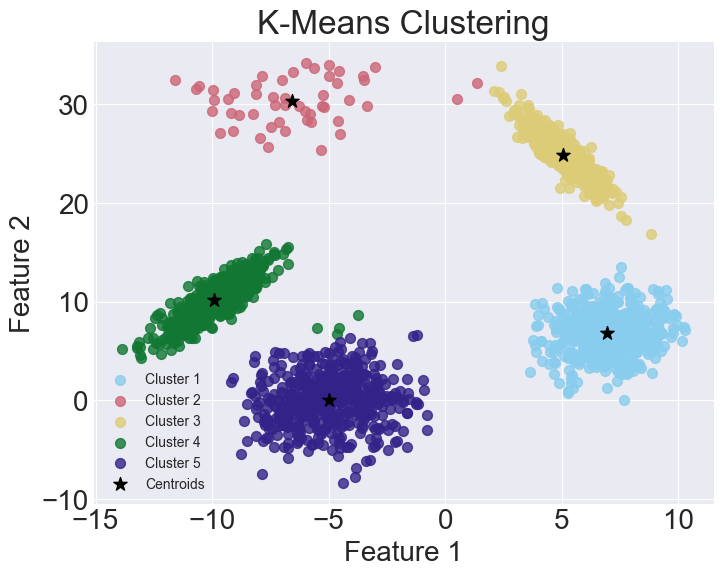

In [102]:
# place me before you batch cluster the dataset
np.random.seed(4)

# cluster batch
five_cluster.cluster_batch(k = 5,n_iter=10)

five_cluster.plot_clusters()

**Question 4:** In way ways (if any) did the clustering improve? **Why?**

**Answer 4:** I observed that the clustering did not improve much, though it is much more consistent. Running K-means multiple times with 10 iterations for every k value can improve the consistency of the clustering results, even if it doesn't significantly improve the clustering quality. This is because K-means can sometimes get stuck in a local optimum, resulting in different clustering results depending on the initial conditions. By running K-means multiple times and choosing the best result, I am reducing the likelihood of getting stuck in a suboptimal solution and increasing the likelihood of finding the global optimum.

### 1e) Update elbow plot for the `five_blobs` dataset

Now that you have experimented with `cluster` and `cluster_batch`, update your `elbow_plot` method to use `cluster_batch` instead of `cluster`. To do this, add a keyword argument `n_iter` to `elbow_plot`. Give it a default value of 1. (*And don't forget to update the docstring to include the new parameter!*)

In the cell below, test out your updated `elbow_plot` method using the same max $k$ value and number of iterations (for each $k$ value) as you used above. Create an elbow plot showing the inertia with different $k$ values.

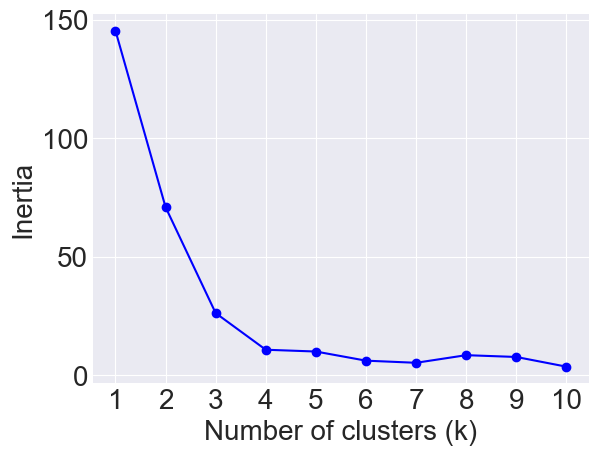

In [103]:
five_cluster.elbow_plot(10, 10)

**Question 5:** How predictive is the updated elbow plot of the number of clusters in the dataset compared to the previous ones that you made?

**Answer 5:** It is roughly as predictive and not much more. However, the drop-off between the k=2 and k=3 is much smaller compared to the previous elbow plots. This is likely due to the increased consistency in the results, which can help to reduce the variability in the elbow plot and provide a more accurate estimate of the optimal number of clusters. 

## Task 2: Image Segmentation and compression

In this task, you will apply K-means to one image and to compress it (*image compression*). The idea is that you will find $k$ RGB color centroids in the image, then replace each pixel in the image with the nearest centroid. This will compress an image, by only using $k$ colors to represent it. You can also think of this as doing a simple image region segmentation: regions with similar colors will belong to the same cluster. It also makes some cool retro effects!

### 2a) Load in baby bird image

- Use the imported `imread` method below to load in the `baby_bird.jpg` image.
- Use `plt.imshow` to display it in the notebook below. Turn off plot ticks!

In [104]:
from matplotlib.image import imread

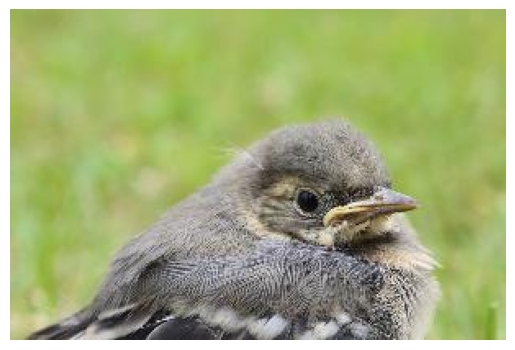

In [105]:
# Load the image
birdie = imread('data/baby_bird.jpg')

# Display the image
plt.imshow(birdie)
plt.axis('off')
plt.show()

### 2b) Preprocess image

- Fill in the function below to collapse (flatten) the 2D image into a big 1D vector of RGB values. For example, for the bird image, your function should take the shape `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`.
- Reshape the bird image from `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`. Final shape for baby bird image should be: `(61206, 3)`

In [106]:
def flatten(img):
    '''Flattens `img` to N 1D vectors.
    For example, for an RGB image, `(num_rows, num_cols, rgb)` -> `(num_rows*num_cols, rgb)`.
    
    Parameters:
    -----------
    img: ndarray. shape=(num_rows, num_cols, rgb)
    
    Returns:
    -----------
    Flattened `img`. ndarray. shape=(num_rows*num_cols, rgb)
    '''
    return img.reshape(-1, img.shape[-1])

In [107]:
birdie_data = flatten(birdie)

### 2c) Cluster RGB values in image

- Run K-means on the bird data vector.
- Implement `replace_color_with_centroid`: replace every pixel in the image with the nearest centroid RGB value.
- Compress the image by running `replace_color_with_centroid`.

In [108]:
birdie_cluster = kmeans.KMeans(birdie_data)
birdie_cluster.replace_color_with_centroid(70)

### 2d) Postprocessing and visualization

- Rehape the compressed image data back to its original dimensions.
- Plot it below.

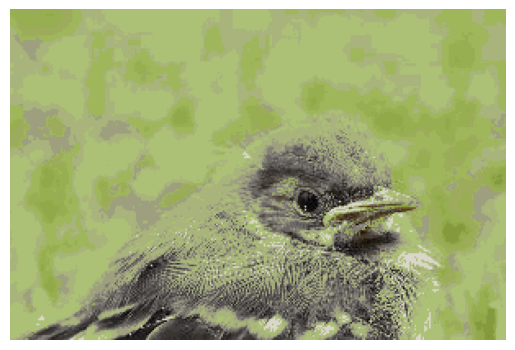

In [109]:
# reshape compressed image data back to its original dimensions
compressed_birdie = birdie_cluster.data.reshape(birdie.shape)

# plot compressed image
plt.imshow(compressed_birdie)
plt.axis('off')
plt.show()

### 2e) Run K-means and compress an image of your choice

Smaller images run a lot faster.

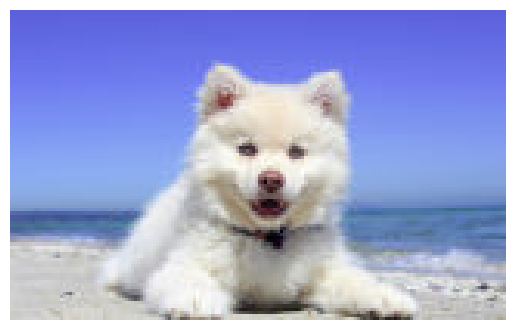

In [110]:
# Load the image
puppy = imread('data/puppy.jpg')

# Display the image
plt.imshow(puppy)
plt.axis('off')
plt.show()

In [111]:
puppy_flatten = flatten(puppy)

In [112]:
puppy_cluster = kmeans.KMeans(puppy_flatten)
puppy_cluster.replace_color_with_centroid(70)

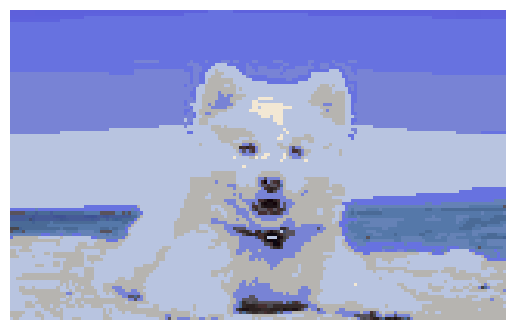

In [113]:
# reshape compressed image data back to its original dimensions
compressed_puppy = puppy_cluster.data.reshape(puppy.shape)

# plot compressed image
plt.imshow(compressed_puppy)
plt.axis('off')
plt.show()

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

### 1) Image compression

- Run K-means on other images and quantify the reduction in space required to store each image (with different values of k).

For this extension, I decided to run k-means on some other images that I chose. They are all quite small because I want to save some run time. The first image is of a kitten. Sorry if you can barely see the image but I had to do so or else the runtime will be too long.

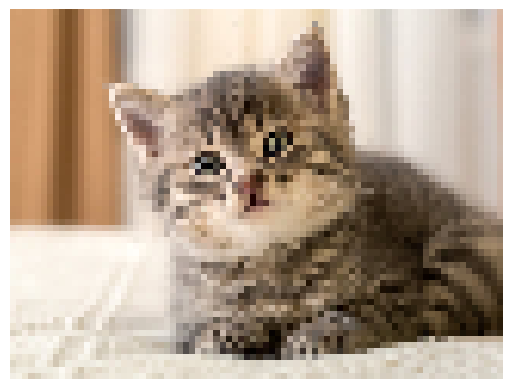

In [114]:
# Load the image
kitten = imread('data/kitten.jpg')

# Display the image
plt.imshow(kitten)
plt.axis('off')
plt.show()

In [115]:
kitten_flatten = flatten(kitten)

In [116]:
kitten_cluster = kmeans.KMeans(kitten_flatten)
kitten_cluster.replace_color_with_centroid(50)

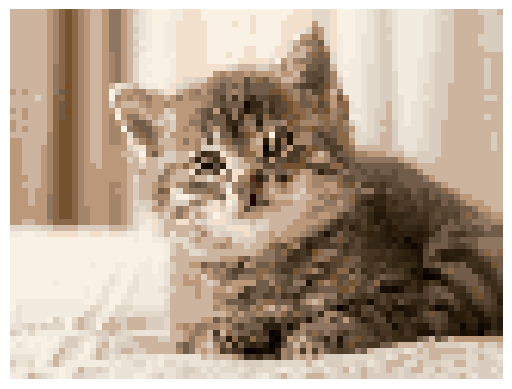

In [117]:
# reshape compressed image data back to its original dimensions
compressed_kitten = kitten_cluster.data.reshape(kitten.shape)

# plot compressed image
plt.imshow(compressed_kitten)
plt.axis('off')
plt.show()

In [118]:
# make compressed_kitten a file of itself
cv2.imwrite('data/compressed_kitten.jpg', compressed_kitten)

# compare sizes
# original image
kitten_path = "data/kitten.jpg"
kitten_size = os.path.getsize(kitten_path)
print(f"File size of {kitten_path}: {kitten_size} bytes")

# compressed image
compressed_kitten_path = "data/compressed_kitten.jpg"
compressed_kitten_size = os.path.getsize(compressed_kitten_path)
print(f"File size of {compressed_kitten_path}: {compressed_kitten_size} bytes")

# calculate percent
print("The compressed image is", compressed_kitten_size/kitten_size, "of the original image")

File size of data/kitten.jpg: 9174 bytes
File size of data/compressed_kitten.jpg: 3910 bytes
The compressed image is 0.4262044909526924 of the original image


Now I will move on to the second image, which is a pixel art of a futuristic city.

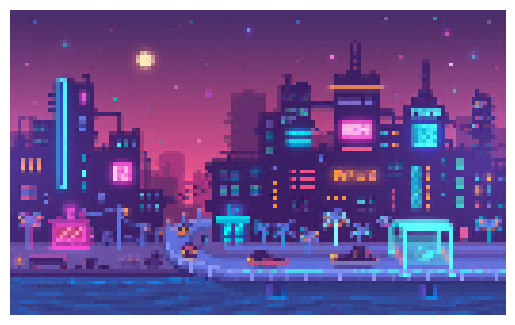

In [119]:
# Load the image
city = imread('data/city.jpg')

# Display the image
plt.imshow(city)
plt.axis('off')
plt.show()

In [120]:
city_flatten = flatten(city)

In [121]:
city_cluster = kmeans.KMeans(city_flatten)
city_cluster.replace_color_with_centroid(100)

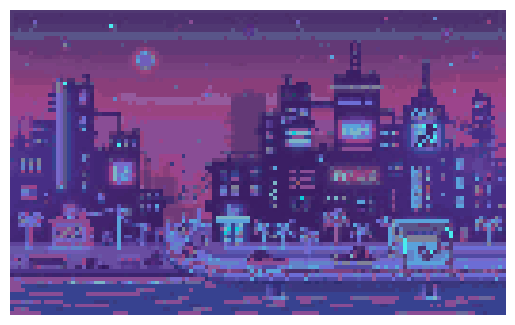

In [122]:
# reshape compressed image data back to its original dimensions
compressed_city = city_cluster.data.reshape(city.shape)

# plot compressed image
plt.imshow(compressed_city)
plt.axis('off')
plt.show()

In [123]:
# make compressed_city a file of itself
cv2.imwrite('data/compressed_city.jpg', compressed_city)

# compare sizes
# original image
city_path = "data/city.jpg"
city_size = os.path.getsize(city_path)
print(f"File size of {city_path}: {city_size} bytes")

# compressed image
compressed_city_path = "data/compressed_city.jpg"
compressed_city_size = os.path.getsize(compressed_city_path)
print(f"File size of {compressed_city_path}: {compressed_city_size} bytes")

# calculate percentage
print("The compressed image is", compressed_city_size/city_size, "of the original image")

File size of data/city.jpg: 25286 bytes
File size of data/compressed_city.jpg: 7821 bytes
The compressed image is 0.30930158981254446 of the original image


Now that I have completed compressing both images, I will analyze the results of my compression.

As for the kitten, I used k=10, 20, 30, 40, and 50. I realized that at k=50 the cat looks the best and you can see a very strong resemblance between the two pictures. This means that my algorithm is working as intended and the k that I chose (50) is a good value. On top of that, the compressed image is noticeably smaller than the original image. As you can see above, the compressed image is roughly 43% the size of the original image, while maintaining a very acceptable amount of detail.

As for the city, I used the same k's as the kitten. However, unfortunately this time, I could not find the same level of success as I could for finding the perfect k for the kitten. As I increased the k's in steps of 10, I noticed that around 20-30, the image is undercompressed, but then once I got to 40-50, the image started to look a bit over-compressed. The details were mostly there, however, in some parts the colors were inverted. I have tried multiple values in between the ranges and also have increased the k yet yielded little to no results. However, I also noticed that for all the values of k that I tested, 100 looks the best, so that is the value that I used. It looks a bit different from the original image, most notably the image is not as vibrant, but passable. As for the size reduction, the compressed image is only 32 percent the size of the original image. 

### 2) Detect number of clusters in other datasets

- Cluster other datasets and create elbow plots to detect the number of clusters.

For this extension, I decided to perform k-means clustering on the iris dataset. There are five variables in the iris dataset so I will perform k-means clustering on a couple of them. First, I will create a pairplot to see which ones seem the most interesting to use. 

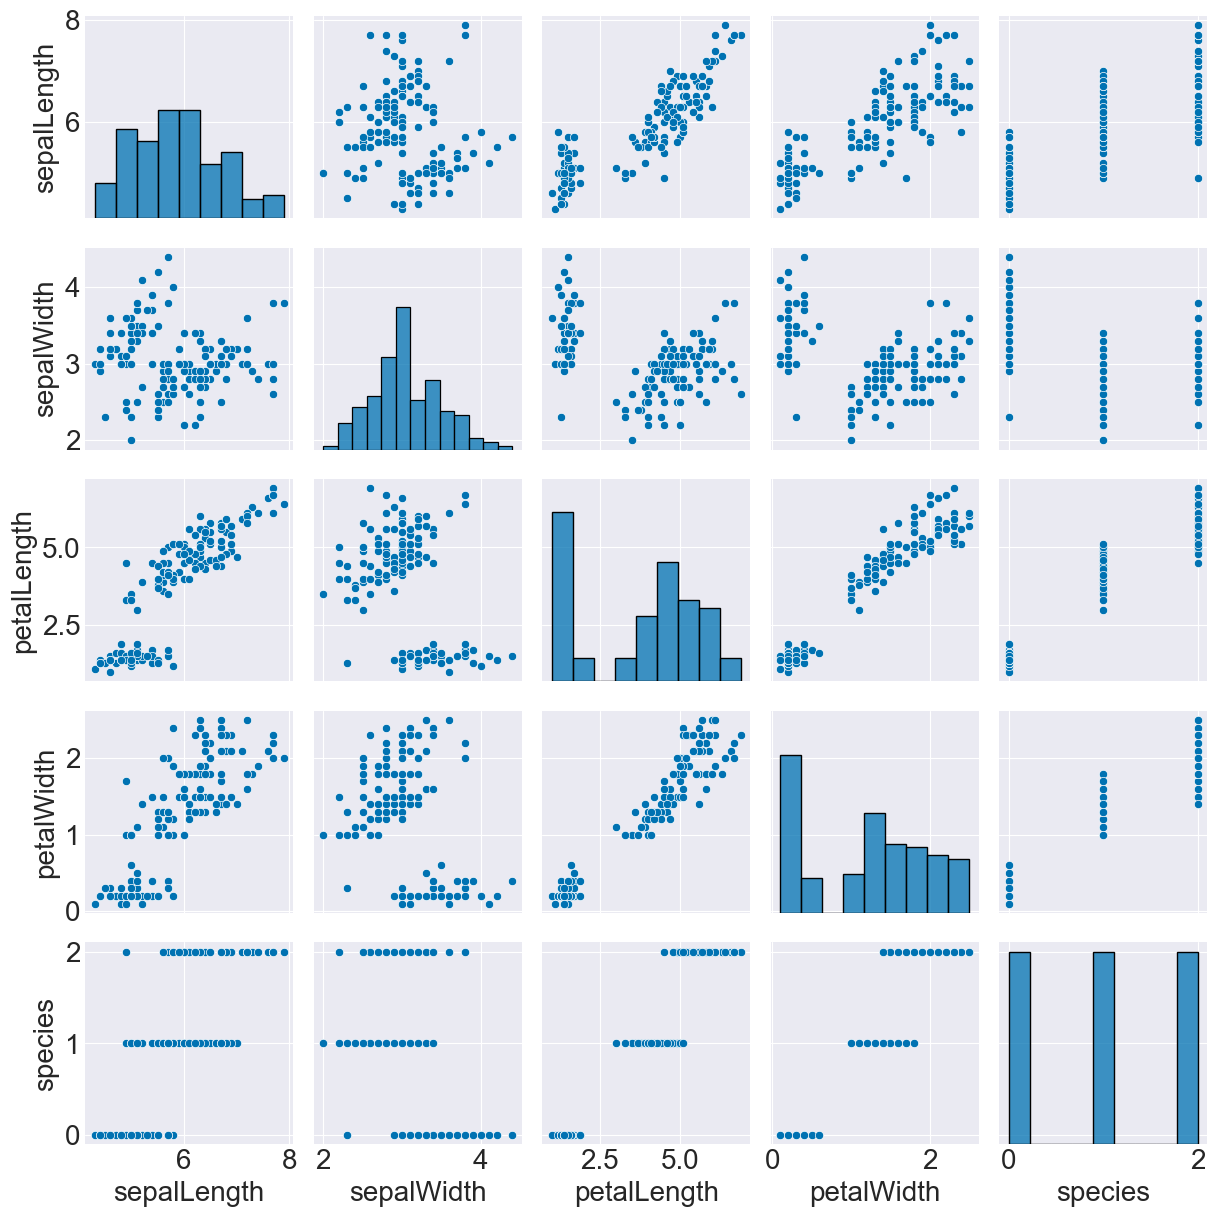

In [124]:
# Load iris dataset from CSV file
iris_df = pd.read_csv('data/iris.csv')
# Create pairplot
sns.pairplot(iris_df)

Some interesting pairs that I found are sepalLength vs. petalLength, petalLength vs. sepalWidth, and petalWidth vs. sepalLength. I will be performing k-means clustering on those pairs to determine how many clusters are present in those data pairs.

First, I will start with sepalLength vs. petalLength. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


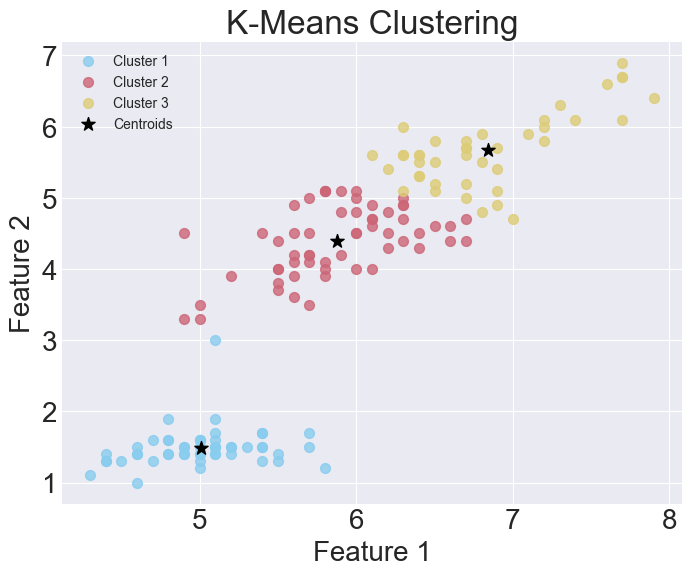

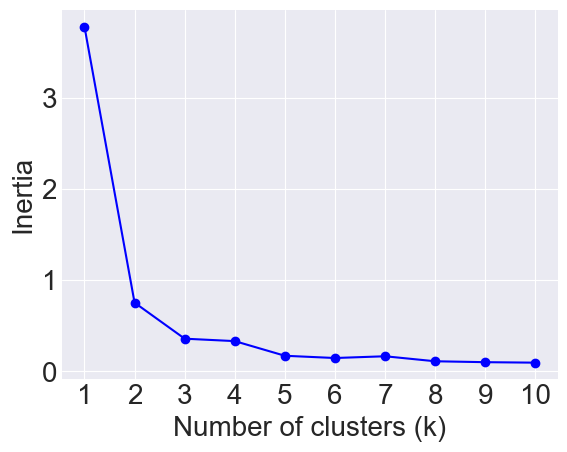

In [125]:
# seed
np.random.seed(2)
# new dataframe
iris_df_cluster_1 = iris_df.iloc[:, [0, 2]]
# convert 
iris_df_cluster_1 = iris_df_cluster_1.to_numpy()
# perform kmeans clustering
iris_cluster_1 = kmeans.KMeans(iris_df_cluster_1)
iris_cluster_1.cluster(k = 3)
# plot
iris_cluster_1.plot_clusters()
# elbow plot, 10 iterations
iris_cluster_1.elbow_plot(10, 10)

Visually speaking, we see 2 clusters: a big cluster on top and a smaller cluster on the bottom. Using an elbow plot, we can clearly see that using 3 clusters is the best move, since increasing the number of clusters to four does not reduce the inertia by much, and 5 seems a little too much. We can confirm that using 3 clusters work visually, where the top cluster is split into two smaller clusters, which make sense. 

Now we move onto petalLength vs. sepalWidth. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


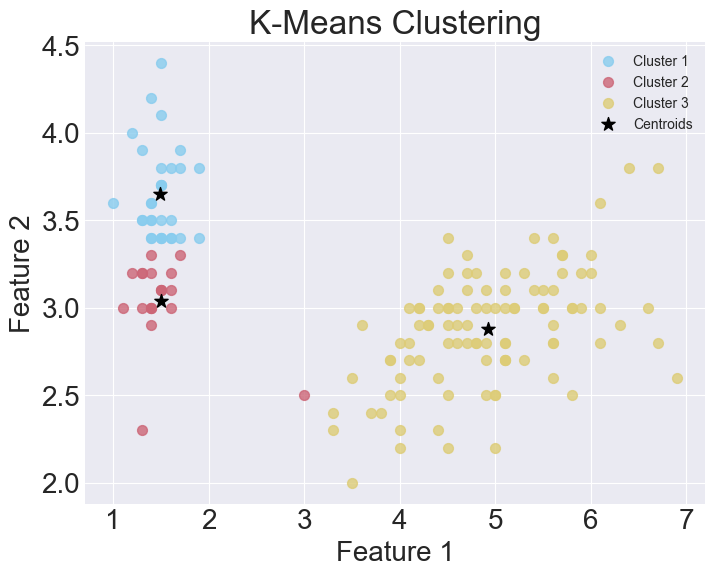

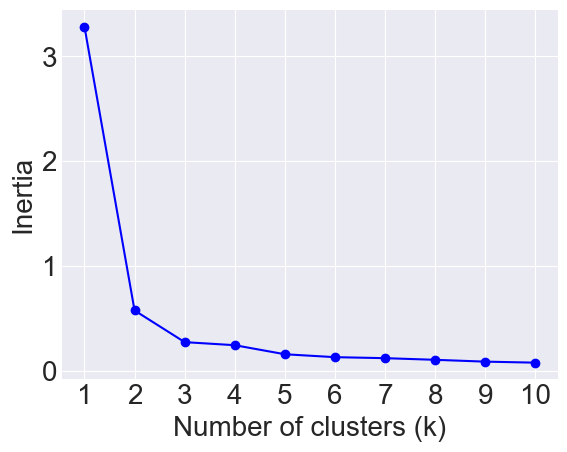

In [126]:
# seed
np.random.seed(2)
# new dataframe
iris_df_cluster_2 = iris_df.iloc[:, [2, 1]]
# convert 
iris_df_cluster_2 = iris_df_cluster_2.to_numpy()
# perform kmeans clustering
iris_cluster_2 = kmeans.KMeans(iris_df_cluster_2)
iris_cluster_2.cluster(k = 3)
# plot
iris_cluster_2.plot_clusters()
# elbow plot, 10 iterations
iris_cluster_2.elbow_plot(10, 10)

The variables chosen here share quite a similarity with the ones chosen before this. We see two clusters, a big one and a smaller one. The elbow plot here is also very similar to the elbow plot shown in the previous example: it tells us that 3 is probably the optimal number of clusters. However, when we set k=3 and make the cluster plot, we can see that the smaller cluster is the one divided in half and not the larger one. Regardless, we can still confirm both using a scatterplot and visually that k=3 is the best number of clusters for these sets of variables. 

Finally, we move on to petalWidth vs. sepalLength. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


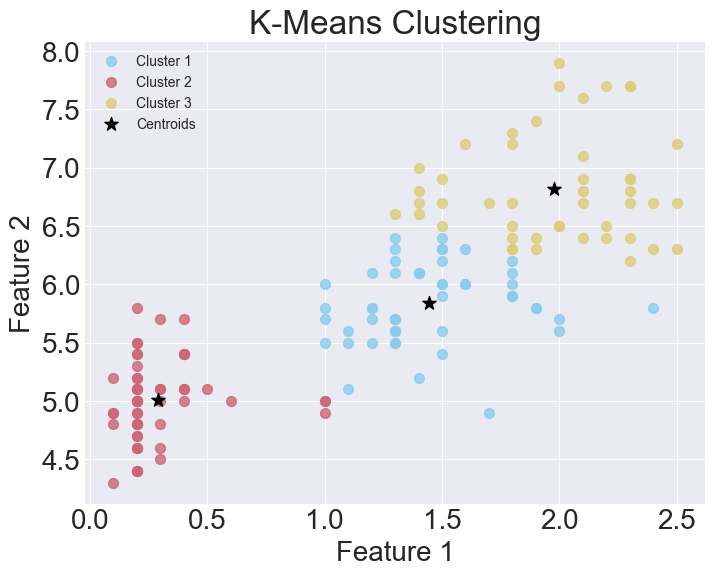

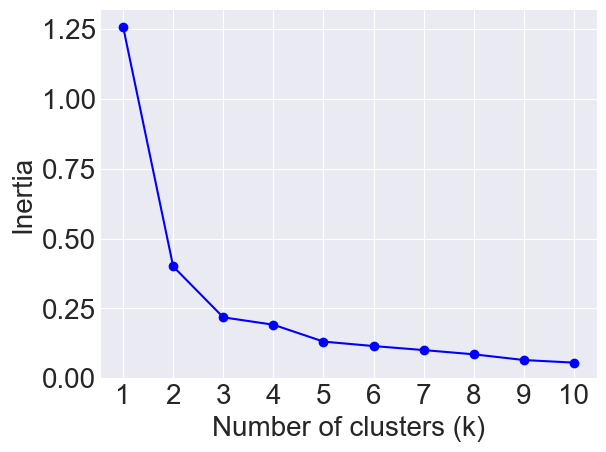

In [127]:
# seed
np.random.seed(2)
# new dataframe
iris_df_cluster_3 = iris_df.iloc[:, [3, 0]]
# convert 
iris_df_cluster_3 = iris_df_cluster_3.to_numpy()
# perform kmeans clustering
iris_cluster_3 = kmeans.KMeans(iris_df_cluster_3)
iris_cluster_3.cluster(k = 3)
# plot
iris_cluster_3.plot_clusters()
# elbow plot, 10 iterations
iris_cluster_3.elbow_plot(10, 10)

Once again, the situation is very similar compared to the previous examples, however, the inertia values here are much smaller. Here, we see a giant cluster and a smaller cluster. The elbow plot tells the same thing here as well: k=3 yields the best result, since the reduction in inertia of going to 4 is very miniscule. Setting k=3, we can confirm the information that we see in the elbow plot: the big cluster is divided into two smaller clusters with a centroid in each of them. The smaller cluster remains intact. Therefore, we can confirm that for these sets of variables, a k-value of 3 works the best.

### 3) Cluster additional datasets

### 4) Other cluster detection metrics

- Research number-of-clusters detection metrics (e.g. silhouette score) and compare them to inertia on a dataset of your choice. Which does a better job at detecting number of clusters?

### 5) Animate the clustering process

- Make an animation showing K-means clustering unfolding across iterations until the algorithm converges. 

### 6) Leader algorithm

- Implement the leader algorithm and compare clustering results and runtime with K-means on datasets of your choice.

I implemented a method called leader_cluster in the kmeans.py file that uses the leader algorithm as well as a method called leader_replace_color_with_centroids that does the same thing as the other one except using the leader algorithm method. To test the difference in runtimes, I will test both algorithms using image compression. To save on runtime, I will be using the kitten image since it is the smallest.

**Update:**
I tried to make the leader algorithm work but I couldn't fix some bugs regarding the sizes and when I do the algorithm doesn't work properly. I have even tried ChatGPT and it doesn't know what's wrong so if you can point out to me what I did wrong that would be very nice. The code is still in the kmeans.py file.

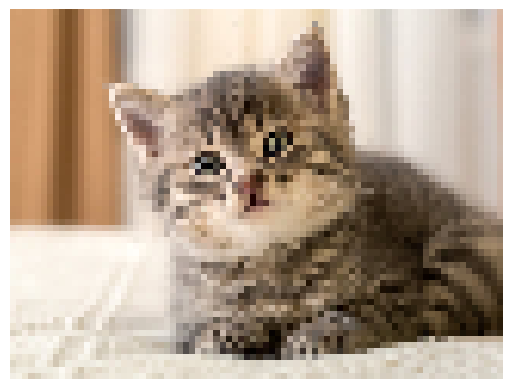

In [128]:
# Load the image
kitten = imread('data/kitten.jpg')

# Display the image
plt.imshow(kitten)
plt.axis('off')
plt.show()

kitten_flatten = flatten(kitten)

In [129]:
# import time
import time
# start time
start_time = time.time()
# run using normal algorithm
kitten_cluster = kmeans.KMeans(kitten_flatten)
kitten_cluster.replace_color_with_centroid(50)
# end time
end_time = time.time()
# print time
print("Total runtime:", end_time - start_time)

Total runtime: 23.951628923416138


In [130]:
# # start time
# start_time = time.time()
# # run using leader algorithm
# kitten_cluster = kmeans.KMeans(kitten_flatten)
# kitten_cluster.leader_replace_color_with_centroid(50)
# # end time
# end_time = time.time()
# # print time
# print("Total runtime:", end_time - start_time)